In [58]:
%%sh
pip install tqdm

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [5]:
print (train.count())
print (test.count())

id               159571
comment_text     159571
toxic            159571
severe_toxic     159571
obscene          159571
threat           159571
insult           159571
identity_hate    159571
dtype: int64
id              153164
comment_text    153164
dtype: int64


In [6]:
count_keys={}
labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for k in labels:
    print (train[k].value_counts())
    count_keys[k]=train[k].value_counts()[1]

0    144277
1     15294
Name: toxic, dtype: int64
0    157976
1      1595
Name: severe_toxic, dtype: int64
0    151122
1      8449
Name: obscene, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: insult, dtype: int64
0    158166
1      1405
Name: identity_hate, dtype: int64


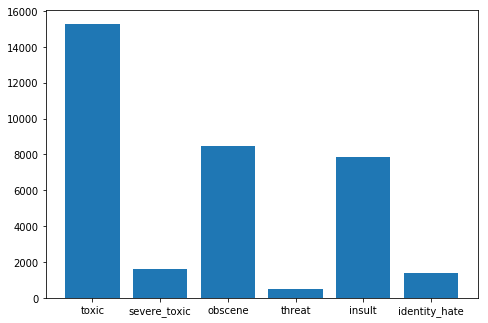

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
axis_labels = count_keys.keys()
label_counts = count_keys.values()
ax.bar(axis_labels,label_counts)
plt.show()

We observe a strong class imbalance.

In [8]:
train_labels= train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
train_labels.head(3)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0


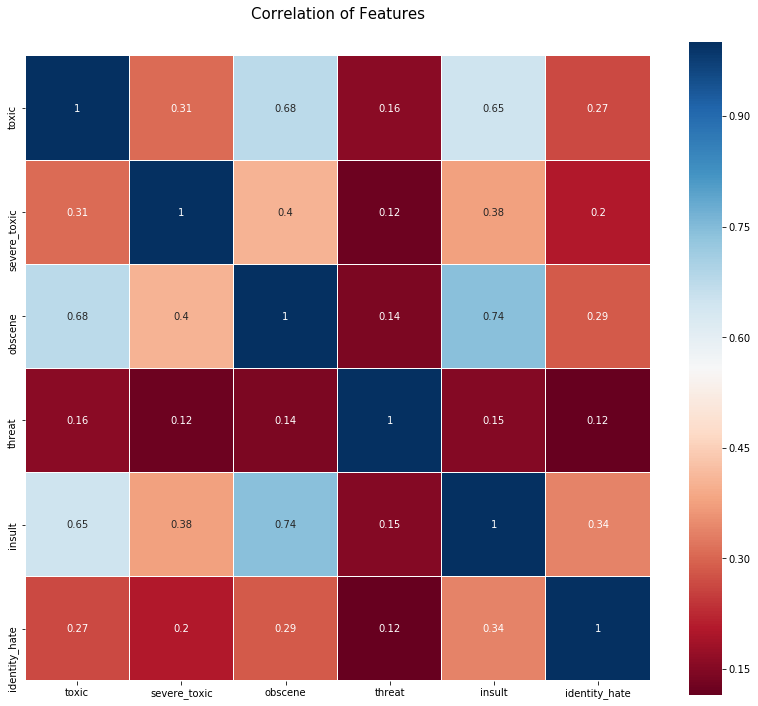

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train_labels.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

We observe a strong correlation between Insult, Obscene and Toxic classes.